# Data Processing

In [1]:
!git clone https://github.com/zygmuntz/goodbooks-10k

fatal: destination path 'goodbooks-10k' already exists and is not an empty directory.


In [2]:
%cd goodbooks-10k/

/content/goodbooks-10k


# EDA

In [3]:
import random
random.seed(2001)

import pandas as pd
pd.set_option('display.max_columns', 20)
ratings = pd.read_csv("./ratings.csv")
books = pd.read_csv("./books.csv")
print("List column ratings: ", ratings.columns, "\nList column books", books.columns)
print(ratings.head())
print(books.head())
print(books.describe())

List column ratings:  Index(['user_id', 'book_id', 'rating'], dtype='object') 
List column books Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')
   user_id  book_id  rating
0        1      258       5
1        2     4081       4
2        2      260       5
3        2     9296       5
4        2     2318       3
   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3             3  4640799          491  439554934   
2        3              41865         41865  3212258          226  316015

In [4]:
print(ratings.shape)
ratings.iloc[:25]

(5976479, 3)


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
5,2,26,4
6,2,315,3
7,2,33,4
8,2,301,5
9,2,2686,5


In [5]:
print(ratings.shape)
print(ratings.describe())

(5976479, 3)
            user_id       book_id        rating
count  5.976479e+06  5.976479e+06  5.976479e+06
mean   2.622446e+04  2.006477e+03  3.919866e+00
std    1.541323e+04  2.468499e+03  9.910868e-01
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.281300e+04  1.980000e+02  3.000000e+00
50%    2.593800e+04  8.850000e+02  4.000000e+00
75%    3.950900e+04  2.973000e+03  5.000000e+00
max    5.342400e+04  1.000000e+04  5.000000e+00


In [6]:
!pip install scikit-surprise

In [7]:
from surprise.dataset import Dataset
from surprise.reader import Reader
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings, test_size=0.20, random_state=2001)
print('Training data shape: ', train_data.shape)
print('Testing data shape: ', test_data.shape)
test_data.head()

reader = Reader(rating_scale=(1,5))
train_dataset = Dataset.load_from_df(train_data, reader)
test_dataset = Dataset.load_from_df(test_data, reader)
dataset = Dataset.load_from_df(ratings, reader)

Training data shape:  (4781183, 3)
Testing data shape:  (1195296, 3)


# Training

In [8]:
from surprise.prediction_algorithms.random_pred import NormalPredictor
from surprise import accuracy
from surprise.model_selection import train_test_split
temp_train_dataset, temp_test_dataset = train_test_split(dataset, test_size=0.20, random_state=2001)

native = NormalPredictor()
native.fit(temp_train_dataset)

predictions = native.test(temp_test_dataset)
rmse = accuracy.rmse(predictions, verbose=True)
print('Root mean square error on Random: ', rmse)

RMSE: 1.3248
Root mean square error on Random:  1.3247790370603179


In [ ]:
# trying with the training data after preprocessing 
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV

sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False],
}


param_grid = {"sim_options": sim_options}
grid_Search = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"])
grid_Search.fit(train_dataset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [ ]:
print(grid_Search.best_score["rmse"])
print(grid_Search.best_params["rmse"])
results_df = pd.DataFrame.from_dict(grid_Search.cv_results)
print(results_df)

In [ ]:
from surprise import SVD

param_grid = {'n_epochs': [5, 10], 
              'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6],
              'random_state': [2001]}
grid_Search_SVD = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], n_jobs=2)
grid_Search_SVD.fit(train_dataset)

In [ ]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])
results_df = pd.DataFrame.from_dict(gs.cv_results)
print(results_df)

In [ ]:
preds_KMeans = clusterer_KMeans.predict(book_ratings_training)
preds_Kmeans_Validating = clusterer_KMeans.predict(book_ratings_validating)
from sklearn.metrics import silhouette_score
kmeans_score_training = silhouette_score(book_ratings_training, preds_KMeans)
print("Train score: ", kmeans_score, " with k = ", i)
kmeans_score_validating = silhouette_score(book_ratings_validating, preds_Kmeans_Validating)
print("Valid score: ", kmeans_score_validating, " with k = ", i)

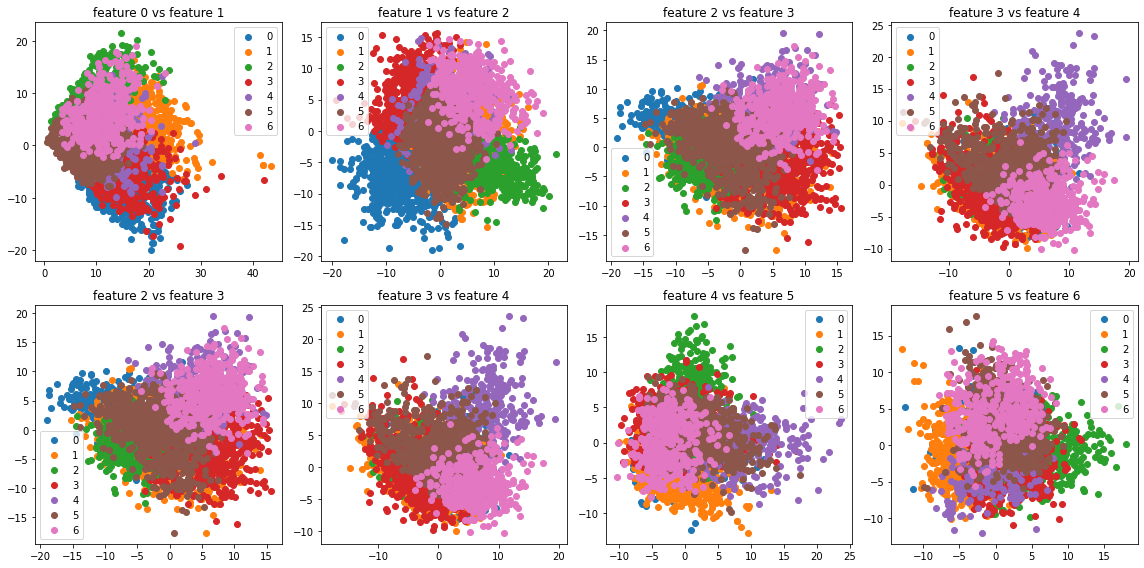

In [ ]:
import matplotlib.pyplot as plt
u_labels = np.unique(preds_Kmeans_Validating)

row_size, column_size = 2, 4
fix, ax = plt.subplots(row_size, column_size, figsize=(column_size*4, row_size*4))
for i in range(row_size):
  for j in range(column_size):
    for k in u_labels:
      index = i * row_size + j
      ax[i][j].scatter(book_ratings_validating.to_numpy()[preds_Kmeans_Validating == k , index] , book_ratings_validating.to_numpy()[preds_Kmeans_Validating == k , index + 1] , label = k)
      ax[i][j].set_title(f'feature {index} vs feature {index + 1}')
      # ax[i][j].axis('off')
      ax[i][j].legend()
plt.tight_layout()
plt.show()

In [ ]:
indices = book_ratings_training.index
preds = pd.DataFrame(data=preds_KMeans, columns=['cluster']).set_index(indices)
preds.head(10)

,cluster
user_id,
35338,0
4509,0
49507,1
29806,5
14183,5
29655,5
41000,2
2018,6
23074,2


In [ ]:
# get a list of the highest-rated books for each cluster
def get_cluster_favorites(cluster_number):
    # create a list of cluster members
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    # build a dataframe of that cluster's book ratings
    cluster_ratings = user_book_rating.loc[cluster_membership]
    # drop books that have fewer than 10 ratings by cluster members
    cluster_ratings = cluster_ratings.dropna(axis='columns', thresh=10)
    # find the cluster's mean rating overal and for each book
    means = cluster_ratings.mean(axis=0)
    # sort books by mean rating
    favorites = means.sort_values(ascending=False)
    return favorites

# for each cluster, determine the overall mean rating cluster members have given books
def get_cluster_mean(cluster_number):
    # create a list of cluster members
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    # create a version of the original ratings dataset that only includes cluster members
    cluster_ratings = ratings[ratings['user_id'].isin(cluster_membership)]
    # get the mean rating
    return cluster_ratings['rating'].mean()

In [ ]:
cluster0_books_storted = get_cluster_favorites(0)
cluster0_mean = get_cluster_mean(0)

print('The cluster 0 mean is:', cluster0_mean)
cluster0_books_storted[0:10]

The cluster 0 mean is: 3.9026845728059274


title
Holy Bible: New International Version                                 5.000000
The Book of Mormon: Another Testament of Jesus Christ                 5.000000
The Dot                                                               4.900000
Miss Rumphius                                                         4.857143
The Complete Novels                                                   4.818182
The Little Mouse, the Red Ripe Strawberry, and the Big Hungry Bear    4.800000
Flow: The Psychology of Optimal Experience                            4.800000
The Cat in the Hat and Other Dr. Seuss Favorites                      4.800000
Just Mercy: A Story of Justice and Redemption                         4.758621
The Gashlycrumb Tinies (The Vinegar Works, #1)                        4.750000
dtype: float64

In [ ]:
cluster1_books_storted = get_cluster_favorites(1)
cluster1_mean = get_cluster_mean(1)

print('The cluster 1 mean is:', cluster1_mean)
cluster1_books_storted[0:10]

The cluster 1 mean is: 3.8983046040949527


title
Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)               5.000000
There's Treasure Everywhere: A Calvin and Hobbes Collection          4.913043
Harry Potter Collection (Harry Potter, #1-6)                         4.888889
Harry Potter Page to Screen: The Complete Filmmaking Journey         4.882353
The Days Are Just Packed: A Calvin and Hobbes Collection             4.851852
It's a Magical World: A Calvin and Hobbes Collection                 4.843750
Jesus the Christ                                                     4.825000
Book of Mormon, Doctrine and Covenants, Pearl of Great Price         4.822222
Saga, Vol. 5 (Saga, #5)                                              4.818182
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury    4.812500
dtype: float64

In [ ]:
cluster2_books_storted = get_cluster_favorites(2)
cluster2_mean = get_cluster_mean(2)

print('The cluster 2 mean is:', cluster2_mean)
cluster2_books_storted[0:10]

The cluster 2 mean is: 4.018070766638584


title
The Book of Mormon: Another Testament of Jesus Christ                                               5.000000
A Voice in the Wind (Mark of the Lion, #1)                                                          4.909091
Short Stories from Hogwarts of Heroism, Hardship and Dangerous Hobbies (Pottermore Presents, #1)    4.900000
Harry Potter Boxset (Harry Potter, #1-7)                                                            4.876190
Saga, Vol. 3 (Saga, #3)                                                                             4.875000
The Way of Kings (The Stormlight Archive, #1)                                                       4.870968
A Court of Mist and Fury (A Court of Thorns and Roses, #2)                                          4.827586
Tsubasa: RESERVoir CHRoNiCLE, Vol. 01                                                               4.818182
Rock Chick Reckoning (Rock Chick, #6)                                                               4.818182
Acheron (Dark

In [ ]:
cluster3_books_storted = get_cluster_favorites(3)
cluster3_mean = get_cluster_mean(3)

print('The cluster 3 mean is:', cluster3_mean)
cluster3_books_storted[0:10]

The cluster 3 mean is: 3.931263866941212


title
The Lord of the Rings: The Return of the King: Visual Companion      5.000000
Jesus the Christ                                                     4.944444
The Days Are Just Packed: A Calvin and Hobbes Collection             4.846154
Batman: The Dark Knight Returns #1                                   4.823529
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury    4.821429
A Voice in the Wind (Mark of the Lion, #1)                           4.809524
The Complete Calvin and Hobbes                                       4.808219
The Calvin and Hobbes Lazy Sunday Book                               4.781250
The Calvin and Hobbes Tenth Anniversary Book                         4.780220
It's a Magical World: A Calvin and Hobbes Collection                 4.764706
dtype: float64

In [ ]:
cluster4_books_storted = get_cluster_favorites(4)
cluster4_mean = get_cluster_mean(4)

print('The cluster 4 mean is:', cluster4_mean)
cluster4_books_storted[0:10]

The cluster 4 mean is: 3.998585236297692


title
Guess How Much I Love You                                                4.944444
Gorillas in the Mist                                                     4.900000
A Song of Ice and Fire (A Song of Ice and Fire, #1-4)                    4.888889
The Wake (The Sandman #10)                                               4.833333
Silver Borne (Mercy Thompson, #5)                                        4.818182
Dreamfever (Fever, #4)                                                   4.818182
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings    4.812500
The Complete Calvin and Hobbes                                           4.800000
The Kindly Ones (The Sandman #9)                                         4.800000
Clockwork Princess (The Infernal Devices, #3)                            4.769231
dtype: float64

In [ ]:
cluster5_books_storted = get_cluster_favorites(5)
cluster5_mean = get_cluster_mean(5)

print('The cluster 5 mean is:', cluster5_mean)
cluster5_books_storted[0:10]

The cluster 5 mean is: 3.775249596413962


title
Up from the Grave (Night Huntress, #7)                      4.789474
The Gashlycrumb Tinies (The Vinegar Works, #1)              4.750000
It's a Magical World: A Calvin and Hobbes Collection        4.750000
The Days Are Just Packed: A Calvin and Hobbes Collection    4.739130
Convicted (Consequences, #3)                                4.733333
The Complete Calvin and Hobbes                              4.730769
Saga, Vol. 6 (Saga, #6)                                     4.727273
March: Book One (March, #1)                                 4.722222
A Song of Ice and Fire (A Song of Ice and Fire, #1-4)       4.720000
Harry Potter Collection (Harry Potter, #1-6)                4.695652
dtype: float64

In [ ]:
cluster6_books_storted = get_cluster_favorites(6)
cluster6_mean = get_cluster_mean(6)

print('The cluster 6 mean is:', cluster6_mean)
cluster6_books_storted[0:10]

The cluster 6 mean is: 3.9234237044894393


title
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury      4.928571
There's Treasure Everywhere: A Calvin and Hobbes Collection            4.875000
The Complete Calvin and Hobbes                                         4.837838
The Calvin and Hobbes Tenth Anniversary Book                           4.829268
The Calvin and Hobbes Lazy Sunday Book                                 4.823529
The Sandman: Overture                                                  4.809524
Saga, Vol. 2 (Saga, #2)                                                4.804348
A Game of Thrones: Comic Book, Issue 1                                 4.785714
A Game of Thrones / A Clash of Kings (A Song of Ice and Fire, #1-2)    4.750000
BookRags Summary:  A Storm of Swords                                   4.743590
dtype: float64

In [ ]:
# associate each test user with a cluster
test_set_preds = clusterer_KMeans.predict(book_ratings_testing)
test_set_indices = book_ratings_testing.index
test_set_clusters = pd.DataFrame(data=test_set_preds, columns=['cluster']).set_index(test_set_indices)

test_set_clusters.head()


,cluster
user_id,
35165,4
40105,5
29158,3
30309,3
29043,0


In [ ]:
import numpy as np
mean_ratings_for_cluster_favorites = []

# put each cluster's sorted book list in an array to reference
cluster_favorites = [cluster0_books_storted, cluster1_books_storted, cluster2_books_storted, cluster3_books_storted, cluster4_books_storted, cluster5_books_storted, cluster6_books_storted]

# for each user, find the 10 books the reader has rated that are the top-rated books of the cluster. 
# get the reader's average score for those books
for index, row in test_set_ratings.iterrows():
    user_cluster = test_set_clusters.loc[index, 'cluster']
    favorites = cluster_favorites[user_cluster].index
    user_ratings_of_favorites = []
    # proceed in order down the cluster's list of favorite books
    for book in favorites:
        # if the user has given the book a rating, save the rating to a list
        if np.isnan(row[book]) == False:
            user_ratings_of_favorites.append(row[book])
        # stop when there are 10 ratings for the user
        if len(user_ratings_of_favorites) >= 10:
            break
    # get the mean for the user's rating of the cluster's 10 favorite books
    mean_rating_for_favorites = sum(user_ratings_of_favorites) / len(user_ratings_of_favorites)
    mean_ratings_for_cluster_favorites.append(mean_rating_for_favorites)
    
mean_favorites_rating = sum(mean_ratings_for_cluster_favorites) / len(mean_ratings_for_cluster_favorites)

print('Mean rating for 10 random books per test user: ', mean_benchmark_rating)
print('Mean rarting for 10 books that are the cluster\'s favorites: ', mean_favorites_rating)
print('Difference between ratings: ', mean_favorites_rating-mean_benchmark_rating)

Mean rating for 10 random books per test user:  3.923020986745217
Mean rarting for 10 books that are the cluster's favorites:  4.366918262150226
Difference between ratings:  0.44389727540500923


In [ ]:
import random
def recommend(cluster_assignments, user_id):
    user_cluster = cluster_assignments
    favorites = get_cluster_favorites(user_cluster).index
    favorites = random.choices(favorites, k=9)     
    return favorites
    

# recommendation27229 = recommend(test_set_clusters, user_book_ratings, 27229)
# recommendation31159 = recommend(test_set_clusters, user_book_ratings, 31159)
# recommendation10579 = recommend(test_set_clusters, user_book_ratings, 10579)
# recommendation8667 = recommend(test_set_clusters, user_book_ratings, 8667)

# print('Recommendation for user 27229: ', recommendation27229)
# print('Recommendation for user 31159: ', recommendation31159)
# print('Recommendation for user 10579: ', recommendation10579)
# print('Recommendation for user 8667: ', recommendation8667)

recommendation8667 = recommend(5, 8667)
print(recommendation8667)

['Monster in His Eyes (Monster in His Eyes, #1)', "Arrow's Flight (Heralds of Valdemar, #2)", 'Peter Pan (A Little Golden Book)', 'The Goal: A Process of Ongoing Improvement', "Hell's Corner (Camel Club, #5)", 'Going Too Far', 'The Last Guardian (Artemis Fowl, #8)', "The Negotiator (O'Malley, #1)", 'Breakfast of Champions']


# Graph Neural Network

In [ ]:
import torch
print(torch.version.cuda)
import torch
print(torch.__version__)

11.1
1.10.0+cu111


In [ ]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio===0.9.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
     |█████████████                   | 834.1 MB 1.8 MB/s eta 0:11:24tcmalloc: large alloc 1147494400 bytes == 0x55dff0118000 @  0x7f71e6ae4615 0x55dfb63eb4cc 0x55dfb64cb47a 0x55dfb63ee2ed 0x55dfb64dfe1d 0x55dfb6461e99 0x55dfb645c9ee 0x55dfb63efbda 0x55dfb6461d00 0x55dfb645c9ee 0x55dfb63efbda 0x55dfb645e737 0x55dfb64e0c66 0x55dfb645ddaf 0x55dfb64e0c66 0x55dfb645ddaf 0x55dfb64e0c66 0x55dfb645ddaf 0x55dfb63f0039 0x55dfb6433409 0x55dfb63eec52 0x55dfb6461c25 0x55dfb645c9ee 0x55dfb63efbda 0x55dfb645e737 0x55dfb645c9ee 0x55dfb63efbda 0x55dfb645d915 0x55dfb63efafa 0x55dfb645dc0d 0x55dfb645c9ee
     |████████████████▌               | 1055.7 MB 36.8 MB/s eta 0:00:27tcmalloc: large alloc 1434370048 bytes == 0x55e03476e000 @  0x7f71e6ae4615 0x55dfb63eb4cc 0x55dfb64cb47a 0x55dfb63ee2ed 0x55dfb64dfe1d 0x55dfb6461e99 0x55dfb645c9ee 0x55dfb63efbda 0x55dfb6461d00 0x55dfb645c9ee 0x55dfb63efbda 0x55dfb645e737 0x55dfb64e0c66 0x55d

In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.9.0+cu111.html

Looking in links: https://data.pyg.org/whl/torch-1.9.0+cu111.html
     |████████████████████████████████| 10.4 MB 4.5 MB/s 
     |████████████████████████████████| 3.7 MB 36.6 MB/s 
     |████████████████████████████████| 1.6 MB 38.7 MB/s 
     |████████████████████████████████| 870 kB 701 kB/s 
     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 407 kB 34.5 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.2-py3-none-any.whl size=535570 sha256=ae110dd6ee4a367adbb96d3fd62f41b64daa4a678db2dcd54a897186ba9b8131
  Stored in directory: /root/.cache/pip/wheels/3f/08/13/2321517088bb2e95bfd0e45033bb9c923189e5b2078e0be4ef
Successfully built torch-geometric


In [ ]:
!rm -rf book-recommendations/

In [ ]:
%load_ext autoreload
%autoreload 1

In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://gitlab.com/dragonredu01/book-recommendations.git

Cloning into 'book-recommendations'...
remote: Enumerating objects: 92531, done.
remote: Counting objects: 100% (92531/92531), done.
remote: Compressing objects: 100% (4661/4661), done.
remote: Total 92531 (delta 87903), reused 92467 (delta 87855), pack-reused 0
Receiving objects: 100% (92531/92531), 174.33 MiB | 2.53 MiB/s, done.
Resolving deltas: 100% (87903/87903), done.
Checking out files: 100% (489/489), done.


In [ ]:
%cd /content/book-recommendations/

/content/book-recommendations


In [ ]:
!cat .git/config

[core]
	repositoryformatversion = 0
	filemode = true
	bare = false
	logallrefupdates = true
[remote "origin"]
	url = https://gitlab.com/dragonredu01/book-recommendations.git
	fetch = +refs/heads/*:refs/remotes/origin/*
[branch "main"]
	remote = origin
	merge = refs/heads/main


In [ ]:
%%writefile .git/config
[core]
	repositoryformatversion = 0
	filemode = true
	bare = false
	logallrefupdates = true
[remote "origin"]
	url = https://gitlab.com/dragonredu01/book-recommendations.git
	fetch = +refs/heads/*:refs/remotes/origin/*
[branch "main"]
	remote = origin
	merge = refs/heads/main
[submodule "GNN-RecSys"]
	active = true
	url = https://github.com/Phong940253/GNN-RecSys.git
[submodule "pygcn"]
	active = true
	url = https://github.com/Phong940253/pygcn.git

Overwriting .git/config


In [ ]:
!git submodule update --recursive

Cloning into '/content/book-recommendations/GNN-RecSys'...
Cloning into '/content/book-recommendations/pygcn'...
Submodule path 'GNN-RecSys': checked out '99f63d8865fb887e3cf756888c07e9c7c1f706b3'
Submodule path 'pygcn': checked out '26aeeb42b529e545e4ce416efcdcbc83df07c87e'


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
%cd /content/book-recommendations/model
!git checkout Phong

/content/book-recommendations/model
M	model/train.py
M	pygcn
Already on 'Phong'
Your branch is up to date with 'origin/Phong'.


In [ ]:
!git pull

Already up to date.


In [ ]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit
voting = pd.read_csv("./dataset/raw/BX-Book-Ratings.csv", sep=';', encoding = "ISO-8859-1")
users = pd.read_csv("./dataset/raw/BX-Users.csv", sep=';', encoding = "ISO-8859-1")
books = pd.read_csv("./dataset/raw/BX_Books.csv", sep=';', encoding = "ISO-8859-1")
print(books.columns)
print(users.head())
pd.set_option('max_columns', 10)
print(books.head(5))
print(voting.head())
print(voting.describe())
print(users.describe())
print(books.describe())
# train_idx, test_idx = next(GroupShuffleSplit(test_size=.2, n_splits=2, random_state = 41).split(df, groups=df['User-ID']))
# train, test = df.iloc[train_idx], df.iloc[test_idx]
# train.describe()
# train.to_csv('./data/train.csv', index = False, sep=';')
# test.to_csv('./data/test.csv', index = False, sep=';')

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                Publisher  \
0    Mark P. O. Morford                 2002 

In [ ]:
!python dataset.py

python3: can't open file 'dataset.py': [Errno 2] No such file or directory


In [ ]:
!python train.py

100% 2301/2301 [02:48<00:00, 13.69batch/s, loss=1.55e+5]
Traceback (most recent call last):
  File "train.py", line 205, in <module>
    train_acc = evaluate(train_loader)
  File "train.py", line 175, in evaluate
    return roc_auc_score(labels, predictions, multi_class='ovo')
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py", line 580, in roc_auc_score
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_base.py", line 77, in _average_binary_score
    check_consistent_length(y_true, y_score, sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py", line 333, in check_consistent_length
    % [int(l) for l in lengths]
ValueError: Found input variables with inconsistent numbers of samples: [73601, 2301]


In [ ]:
import torch
print(torch.__version__)

1.10.0+cu111


In [ ]:
!rm -rf "./dataset/processed/"

In [ ]:
!zip -rq data.zip dataset/processed/